# Purpose

This figure justifies our choice of critic features. It should show that using both counts
is better than using either or none.

### Method

I did 3 very large runs. Pretraining for 200 for each, and then training against
critic with one, other, and both critic-counts missing.

We'll show the grahs over epochs. We'll also show the training critic-loss, to see how well it can fit that curve.

### Data structure

Each of the files is a JSON object. Its keys are the 3 training phases: ACTOR, CRITIC, and AC.
Underneath this, it has subfields for what it was recording. For example, NDCG, or TRAINING_CRITIC_ERROR.

### Conclusions

It seems as though BOTH_COUNTS is BEST, NO_COUNTS is WORST, WITHOUT_SEEN is pretty good, and WITHOUT_UNSEEN is pretty bad.


In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set()

DATA = {}
DATA['without_either'] = {}
DATA['without_seen'] = {}
DATA['without_unseen'] = {}
DATA['tentative_with_both'] = {}

print("Now, loading data")

with open("./data/without_either/actor_training.json", "r") as f:
    DATA['without_either']['actor'] = json.loads(f.read())

with open("./data/without_either/critic_training.json", "r") as f:
    DATA['without_either']['critic'] = json.loads(f.read())

with open("./data/without_seen/actor_training.json", "r") as f:
    DATA['without_seen']['actor'] = json.loads(f.read())

with open("./data/without_seen/critic_training.json", "r") as f:
    DATA['without_seen']['critic'] = json.loads(f.read())

with open("./data/without_unseen/actor_training.json", "r") as f:
    DATA['without_unseen']['actor'] = json.loads(f.read())

with open("./data/without_unseen/critic_training.json", "r") as f:
    DATA['without_unseen']['critic'] = json.loads(f.read())

with open("./data/tentative_with_both/actor_training.json", "r") as f:
    DATA['tentative_with_both']['actor'] = json.loads(f.read())

with open("./data/tentative_with_both/critic_training.json", "r") as f:
    DATA['tentative_with_both']['critic'] = json.loads(f.read())
    
print("Data loaded")
print("I'm calling it tentatitive_with_both, because ")
    


Now, loading data
Data loaded
I'm calling it tentatitive_with_both, because 


First, we'll plot just the actors


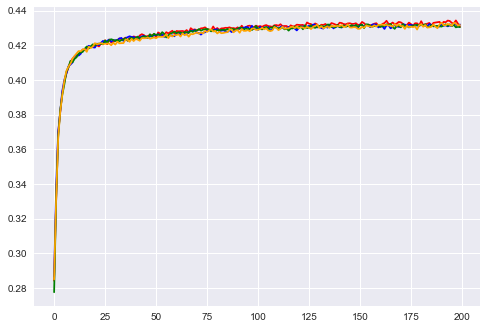

(0.42, 0.44)

In [2]:
print("First, we'll plot just the actors")
# https://stackoverflow.com/questions/20618804/how-to-smooth-a-curve-in-the-right-way

plt.clf()
plt.plot(range(200), DATA['without_either']['actor']['ACTOR']['ndcg'], color="red")
plt.plot(range(200), DATA['without_seen']['actor']['ACTOR']['ndcg'], color="blue")
plt.plot(range(200), DATA['without_unseen']['actor']['ACTOR']['ndcg'], color="green")
plt.plot(range(200), DATA['tentative_with_both']['actor']['ACTOR']['ndcg'], color="orange")
plt.show()
plt.ylim(0.42, 0.44)



In [3]:
actor_parts = np.asarray([
    DATA[part]['actor']['ACTOR']['ndcg']
    for part in 
    ['without_either', 'without_seen', 'without_unseen', 'tentative_with_both']
])

average_actor_parts = np.mean(actor_parts, axis=0).tolist()





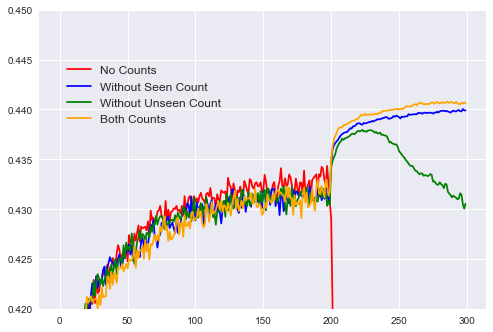

0.440785557032
0.440095841885
0.437952548265
Good prevails! without_seen is pretty good, but not as good as with both.
NOTE: I'm only showing 100 epochs of AC-training, because we want  


In [4]:
# Now,I want to plot with everything...

all_without_either = DATA['without_either']['actor']['ACTOR']['ndcg'] + DATA['without_either']['critic']['AC']['ndcg']
all_without_seen = DATA['without_seen']['actor']['ACTOR']['ndcg'] + DATA['without_seen']['critic']['AC']['ndcg']
all_without_unseen = DATA['without_unseen']['actor']['ACTOR']['ndcg'] + DATA['without_unseen']['critic']['AC']['ndcg']
all_tentative_with_both = DATA['tentative_with_both']['actor']['ACTOR']['ndcg'] + DATA['tentative_with_both']['critic']['AC']['ndcg']

# I ran this with 50 more training steps than the others. 

plt.clf()
# plt.plot(range(350), all_without_either, color="red", label="No Counts")
# plt.plot(range(350), all_without_seen, color="blue", label="Only Seen Count")
# plt.plot(range(350), all_without_unseen, color="green", label="Only Unseen Count")
# plt.plot(range(300), all_tentative_with_both, color='orange', label="Both Counts")

plt.plot(range(300), all_without_either[0:300], color="red", label="No Counts")
plt.plot(range(300), all_without_seen[0:300], color="blue", label="Without Seen Count")
plt.plot(range(300), all_without_unseen[0:300], color="green", label="Without Unseen Count")
plt.plot(range(300), all_tentative_with_both[0:300], color='orange', label="Both Counts")



leg = plt.legend(fontsize=12, shadow=True, loc=(0.05, 0.60))

plt.ylim(0.42, 0.45)
plt.show()

print(max(all_tentative_with_both))
print(max(all_without_seen))
print(max(all_without_unseen))

print("Good prevails! without_seen is pretty good, but not as good as with both.")
print("NOTE: I'm only showing 100 epochs of AC-training, because we want  ")



In [5]:

plt.clf()

plt.plot(range(200), average_actor_parts, color="black", label="shared_actor")

plt.plot(range(199, 300), [average_actor_parts[-1]] + DATA['without_either']['critic']['AC']['ndcg'][:100], color="red", label="No Counts")
plt.plot(range(199, 300), [average_actor_parts[-1]] + DATA['without_seen']['critic']['AC']['ndcg'][:100], color="blue", label="Without Seen Count")
plt.plot(range(199, 300), [average_actor_parts[-1]] + DATA['without_unseen']['critic']['AC']['ndcg'][:100], color="green", label="Without Unseen Count")
plt.plot(range(199, 300), [average_actor_parts[-1]] + DATA['tentative_with_both']['critic']['AC']['ndcg'], color='orange', label="Both Counts")

leg = plt.legend(fontsize=12, shadow=True, loc=(0.05, 0.60))

plt.ylim(0.42, 0.45)

print(max(all_tentative_with_both))
print(max(all_without_seen))
print(max(all_without_unseen))

print("Good prevails! without_seen is pretty good, but not as good as with both.")
print("NOTE: I'm only showing 100 epochs of AC-training, because we want  ")


0.440785557032
0.440095841885
0.437952548265
Good prevails! without_seen is pretty good, but not as good as with both.
NOTE: I'm only showing 100 epochs of AC-training, because we want  


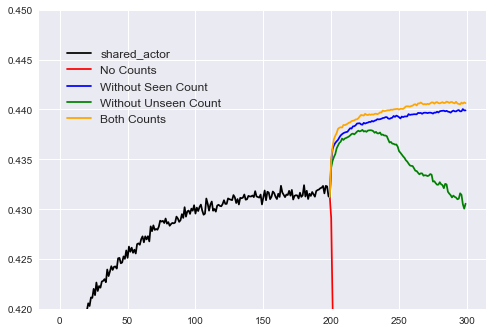

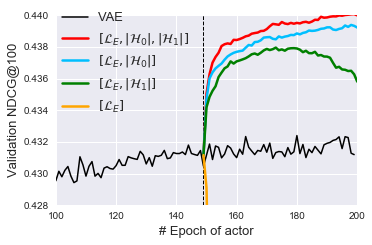

0.440785557032
0.440095841885
0.437952548265
Good prevails! without_seen is pretty good, but not as good as with both.
NOTE: I'm only showing 100 epochs of AC-training, because we want  


In [6]:

fig=plt.figure(figsize=(5.4,3.5))

plt.axvline(x=149, linewidth=1, color='k', linestyle="--")

plt.plot(range(200), average_actor_parts,  linewidth=1.5, linestyle="-", color="black", label="VAE")
plt.plot(range(149, 250), [average_actor_parts[150]] + DATA['tentative_with_both']['critic']['AC']['ndcg'],linewidth=2.5,  color='red', label="$[\mathcal{L}_{E} , | \mathcal{H}_0 |, |\mathcal{H}_1 |]$")
plt.plot(range(149, 250), [average_actor_parts[150]] + DATA['without_seen']['critic']['AC']['ndcg'][:100], linewidth=2.5, color="deepskyblue", label="$[\mathcal{L}_{E} , | \mathcal{H}_0 |]$")
plt.plot(range(149, 250), [average_actor_parts[150]] + DATA['without_unseen']['critic']['AC']['ndcg'][:100], linewidth=2.5, color="green", label="$[\mathcal{L}_{E} , |\mathcal{H}_1 |]$")
plt.plot(range(149, 250), [average_actor_parts[150]] + DATA['without_either']['critic']['AC']['ndcg'][:100], linewidth=2.5, color="orange", label="$[\mathcal{L}_{E}]$")


leg = plt.legend(fontsize=13, shadow=True, loc=(0.002, 0.45))



plt.grid('on')
plt.xlabel('# Epoch of actor', fontsize=13)
plt.ylabel('Validation NDCG@100', fontsize=13)

plt.xlim(100, 200)
plt.ylim(0.428, 0.44)
plt.show()
fig.savefig('plot_feature_ablation.pdf', bbox_inches='tight')

print(max(all_tentative_with_both))
print(max(all_without_seen))
print(max(all_without_unseen))

print("Good prevails! without_seen is pretty good, but not as good as with both.")
print("NOTE: I'm only showing 100 epochs of AC-training, because we want  ")
